In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11, 7),
}
plt.rcParams.update(params)

In [3]:
scaler = StandardScaler()
housing = fetch_california_housing()
housing_data = scaler.fit_transform(housing.data)
housing_target = housing.target
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing_data]

In [4]:
n_epochs = int(1e3)
learning_rate = 0.01
batch_size = 64
n_batches = int(np.ceil(m/batch_size))

## Linear regression

In [5]:
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name='X')
y = tf.constant(housing_target.reshape(-1, 1), dtype=tf.float32, name='y')
theta = tf.Variable(tf.random_uniform([n+1, 1], -1.0, 1.0), name='theta')
y_pred = tf.matmul(X, theta, name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name='mse')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs+1):
        if epoch % 100 == 0:
            print('Epoch', epoch, 'MSE =', mse.eval())
        sess.run(training_op)
    theta_hat = theta.eval()

Epoch 0 MSE = 8.13027
Epoch 100 MSE = 0.7635566
Epoch 200 MSE = 0.5610791
Epoch 300 MSE = 0.54497874
Epoch 400 MSE = 0.53895915
Epoch 500 MSE = 0.53493446
Epoch 600 MSE = 0.5320406
Epoch 700 MSE = 0.5299438
Epoch 800 MSE = 0.5284224
Epoch 900 MSE = 0.5273173
Epoch 1000 MSE = 0.5265139


<BarContainer object of 9 artists>

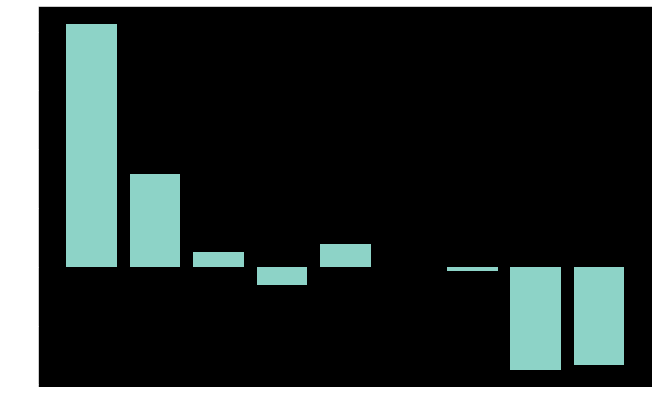

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)
index = range(n+1)
ax.bar(index, theta_hat.flatten())
ax.set_xlabel(r'Component of $\theta$')
ax.set_ylabel('Value')
plt.tight_layout()
plt.show()

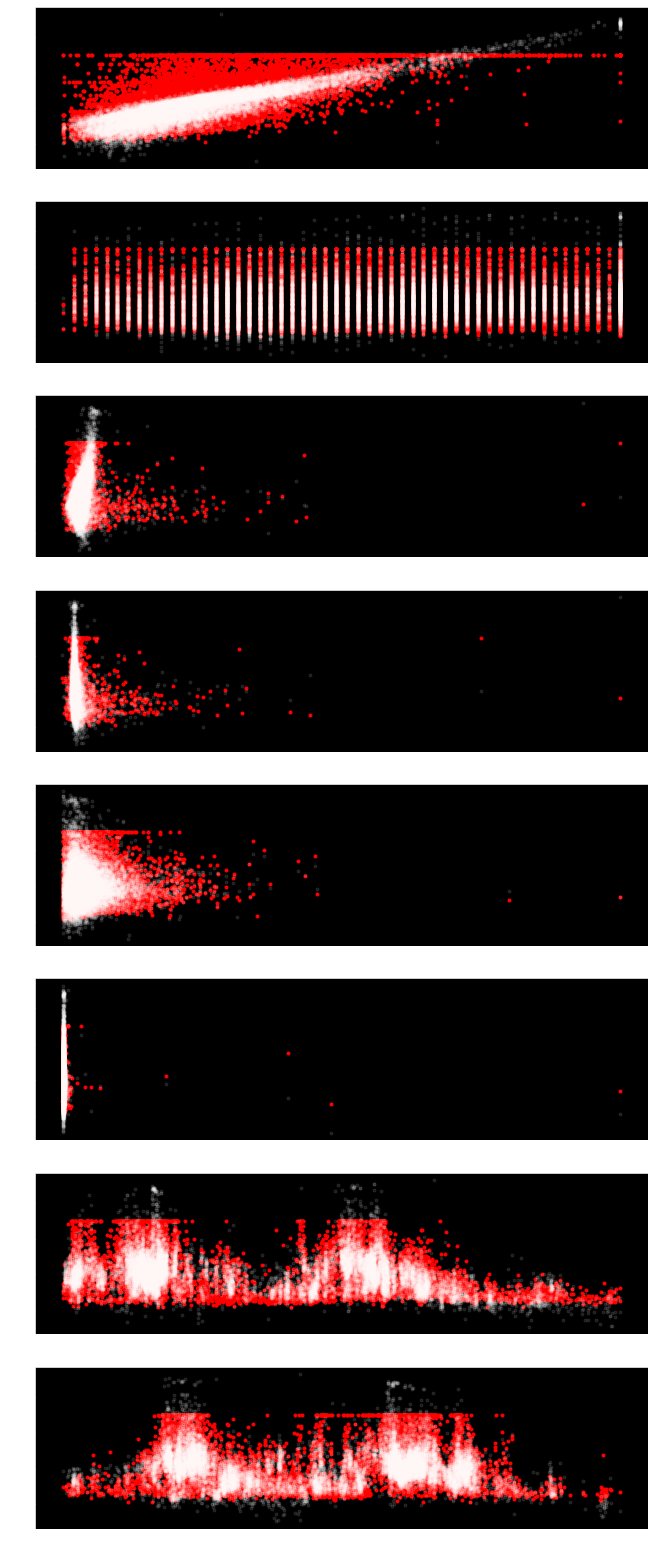

In [7]:
fig, axes = plt.subplots(figsize=(11,28), nrows=8, ncols=1)

for i, ax in enumerate(axes):
    ax.scatter(housing_data_plus_bias[:,i+1], housing_target[:], marker='.', color='r')
    ax.plot(housing_data_plus_bias[:,i+1], np.matmul(housing_data_plus_bias, theta_hat), '.w', alpha=0.1)
    ax.set_xlabel('Feature {}'.format(i+1))
    ax.set_ylabel('Normalized price')
plt.tight_layout()
plt.show()